In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
listings = pd.read_csv('listings.csv')

In [4]:
reviews = pd.read_csv('reviews.csv')

In [5]:
calendar = pd.read_csv('calendar.csv')

In [6]:
def clean_calendar_data(df):
    df['price'] = df['price'].replace(r'[\\$,]', '', regex=True).astype(float)
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['price', 'date'], inplace=True)
    return df

In [7]:
calendar_cleaned = clean_calendar_data(calendar)

In [8]:
calendar_cleaned

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0
...,...,...,...,...
1308875,14504422,2016-09-20,t,62.0
1308876,14504422,2016-09-19,t,62.0
1308877,14504422,2016-09-18,t,62.0
1308878,14504422,2016-09-17,t,62.0


In [9]:
def clean_listings_data(df):
    numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = df[col].replace(r'[\\$,]', '', regex=True).astype(float, errors='ignore')
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    df.dropna(subset=['price', 'minimum_nights'], inplace=True)
    df['amenities_count'] = df['amenities'].str.split(',').apply(len)  # Add amenities count column
    return df

In [12]:
listings_cleaned = clean_listings_data(listings)

In [14]:
listings_cleaned

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,amenities_count
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,NaN,NaN,f,moderate,f,f,1,NaN,15
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,NaN,NaN,t,moderate,f,f,1,1.30,21
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,moderate,t,f,1,0.47,18
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,NaN,NaN,f,moderate,f,f,1,1.00,23
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,NaN,NaN,f,flexible,f,f,1,2.25,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,f,NaN,NaN,t,strict,f,f,8,0.34,18
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,f,NaN,NaN,f,strict,f,f,2,NaN,24
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,f,NaN,NaN,f,flexible,f,f,1,NaN,2
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,f,NaN,NaN,f,strict,f,f,1,2.00,8


In [17]:
def clean_reviews_data(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date', 'reviewer_id'], inplace=True)
    return df

In [24]:
reviews_cleaned = clean_reviews_data(reviews)

In [31]:
reviews_cleaned

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


/var/folders/fk/yxzm2ryx4k7bb2s60whwdgwr0000gn/T/ipykernel_64652/3402119937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


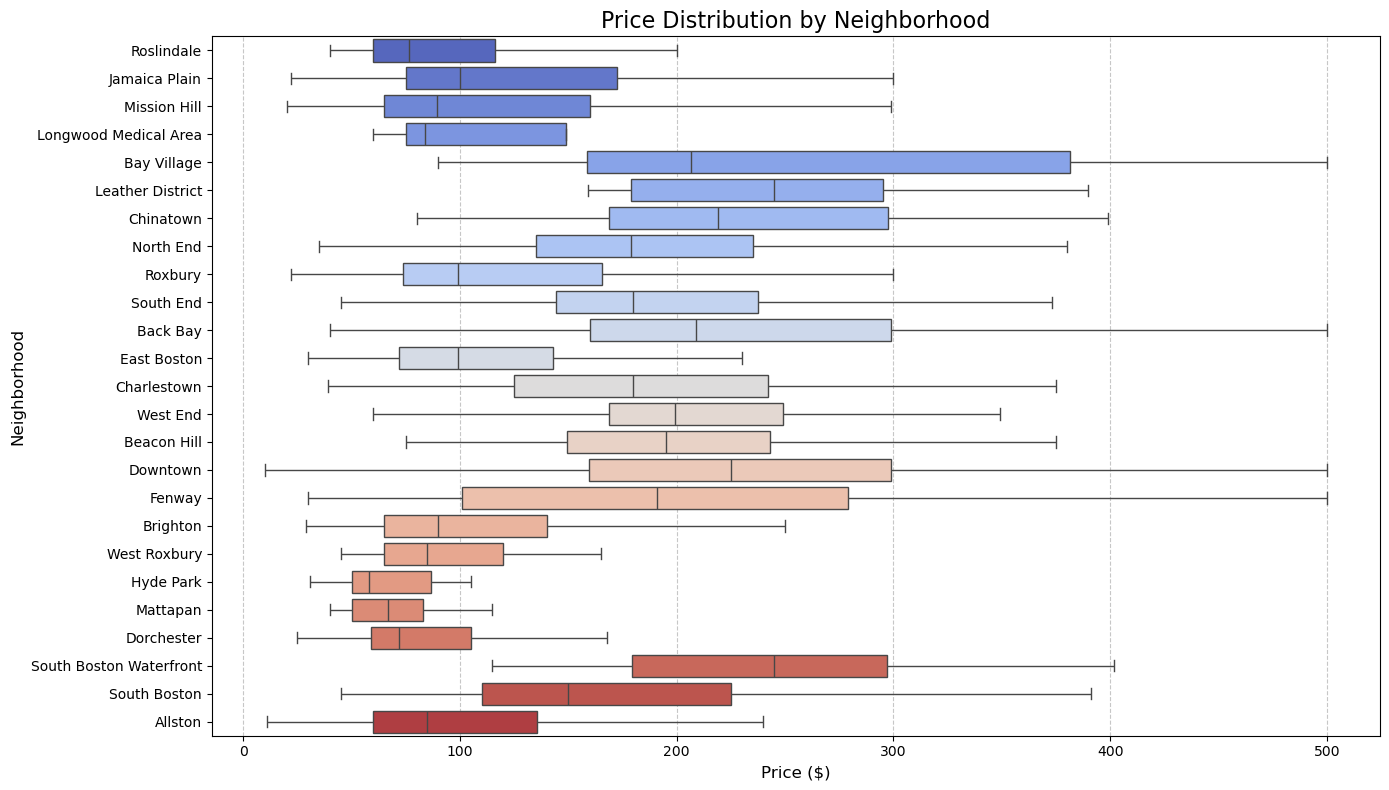

In [33]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=listings_cleaned,
    x='price',
    y='neighbourhood_cleansed',
    showfliers=False,
    palette='coolwarm'
)
plt.title('Price Distribution by Neighborhood', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/fk/yxzm2ryx4k7bb2s60whwdgwr0000gn/T/ipykernel_64652/4253892019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


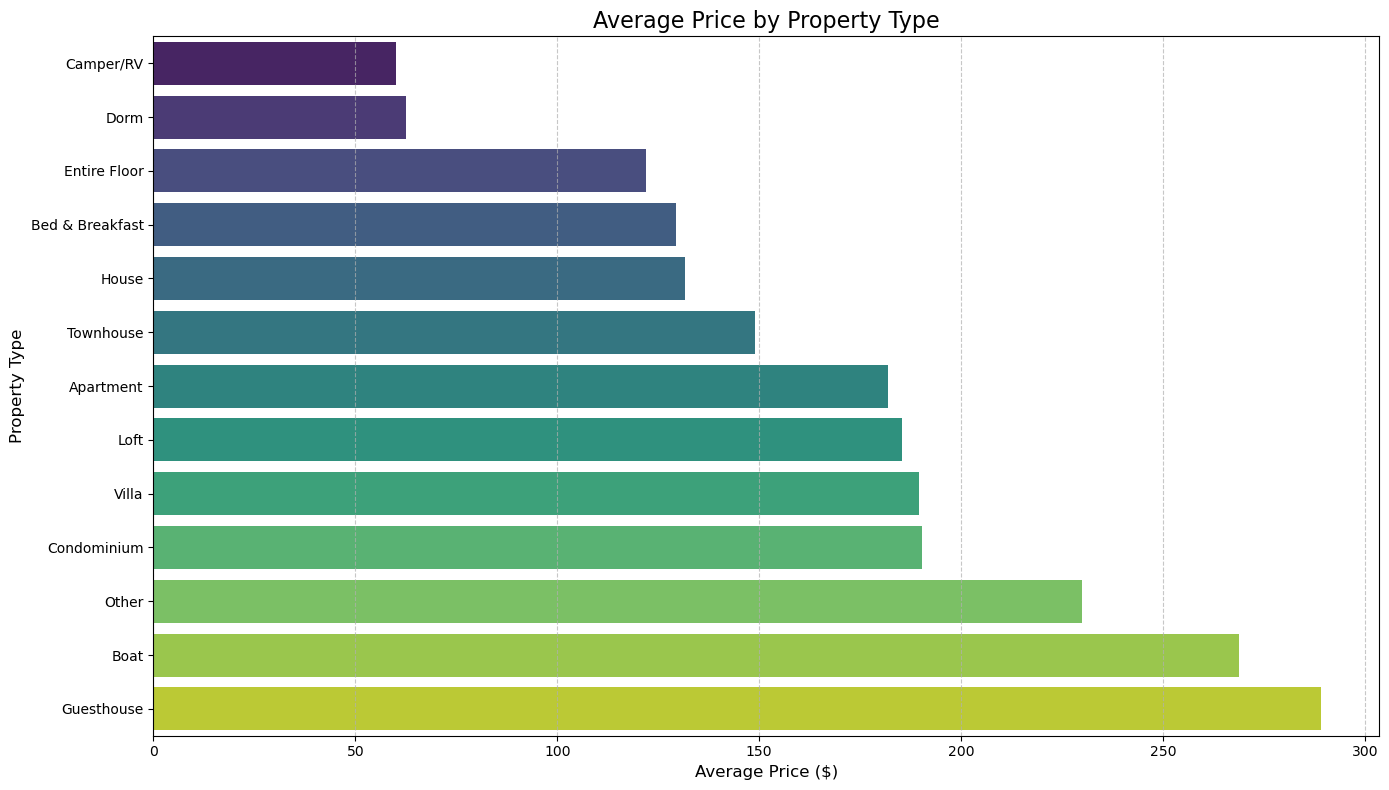

In [35]:
avg_price_by_property_type = listings_cleaned.groupby('property_type')['price'].mean().sort_values()
plt.figure(figsize=(14, 8))
sns.barplot(
    x=avg_price_by_property_type.values,
    y=avg_price_by_property_type.index,
    palette='viridis'
)
plt.title('Average Price by Property Type', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Property Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

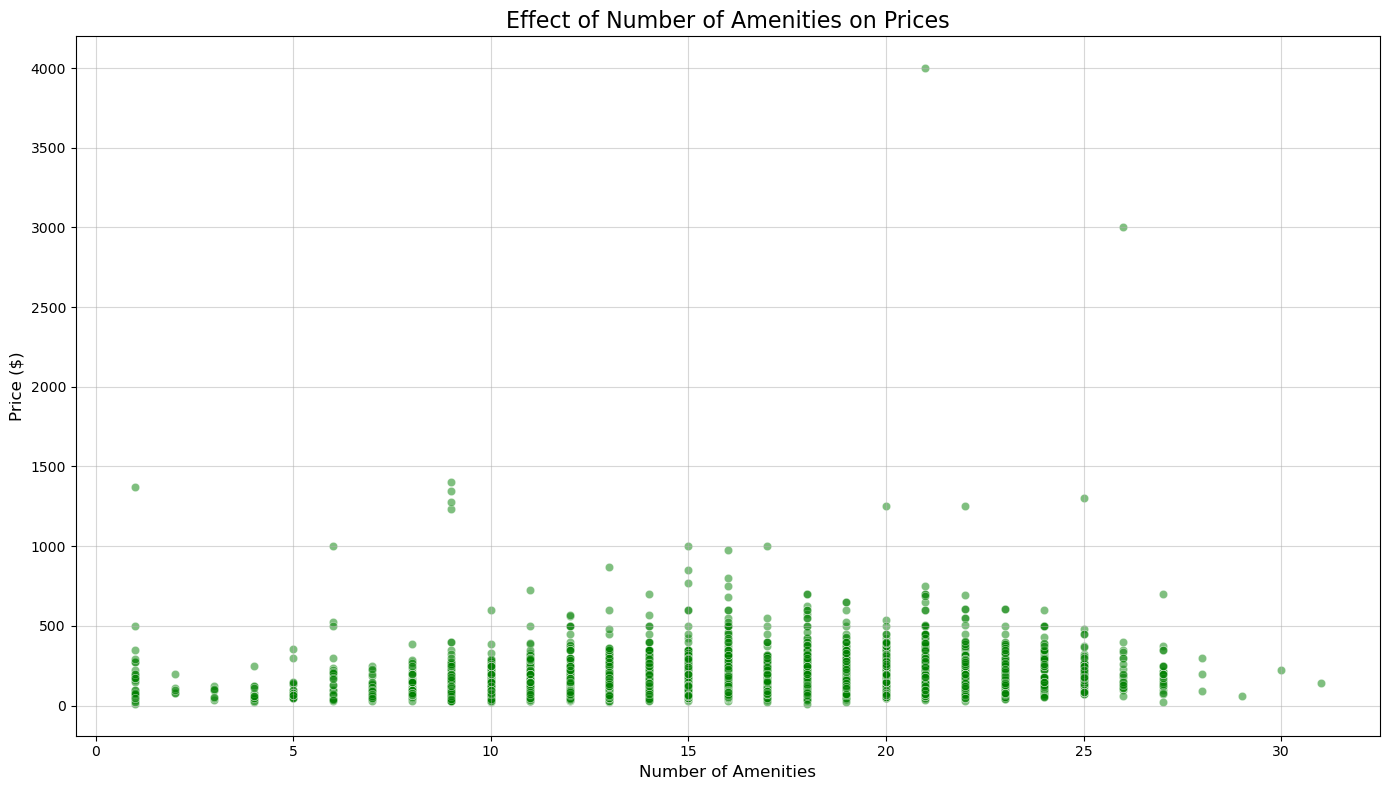

In [37]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=listings_cleaned,
    x='amenities_count',
    y='price',
    alpha=0.5,
    color='green'
)
plt.title('Effect of Number of Amenities on Prices', fontsize=16)
plt.xlabel('Number of Amenities', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

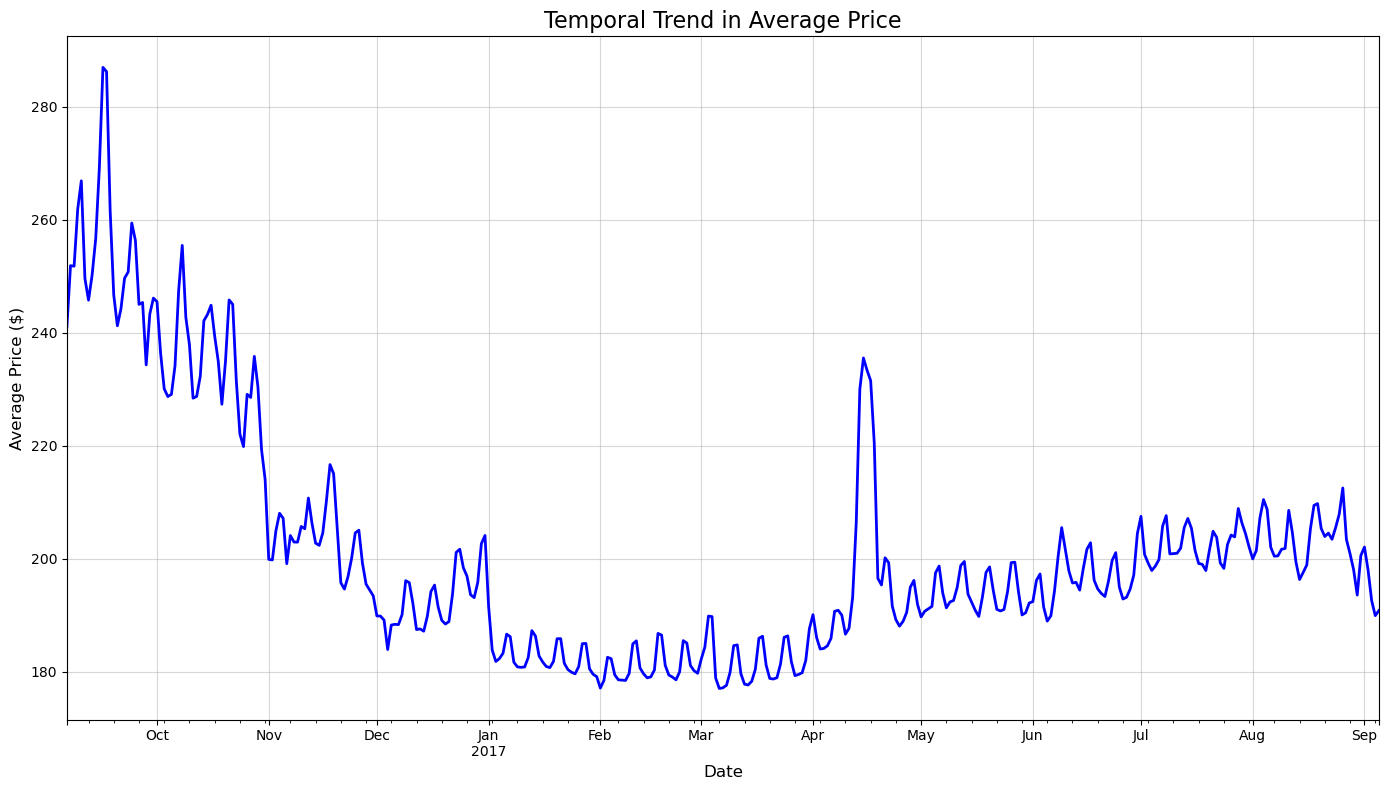

In [39]:
avg_price_by_date = calendar_cleaned.groupby('date')['price'].mean()
plt.figure(figsize=(14, 8))
avg_price_by_date.plot(color='blue', linewidth=2)
plt.title('Temporal Trend in Average Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()